En este caso vamos a intentar visualizar los datos del dispositivo MYO de diferentes formas para ayudar a la comprensión del formato de los mismos.

In [1]:
import multiprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:\\Users\\anita\\Documents\\GitHub\\pyomyo\\examples\\datos_jupyter\\Estirado\\FIST\\'
file = 'de_FIST_1.xlsx'
filepath = path + file
print(filepath)

C:\Users\anita\Documents\GitHub\pyomyo\examples\datos_jupyter\Estirado\FIST\de_FIST_1.xlsx


In [3]:
def abrir(filepath, sheet ):
    # Leer el archivo Excel existente, si existe
    try:
        df = pd.read_excel(filepath, sheet_name=sheet)
    except FileNotFoundError:
        print("No se encontró el archivo" + file )
    return(df)

In [4]:
datos_emg=abrir(filepath,'EMG')
datos_imu=abrir(filepath,'IMU')

In [5]:
def pintar_canales(df,cols):
    rows =int((len(df.columns)-1)/cols)
 
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))

    # Iterar sobre las columnas y hacer un gráfico diferente por columna
    for i, columna in enumerate(df.columns):
        if columna!= "Tiempo":
            axs[(i-1)%rows][int(((i-1)-(i-1)%rows)/rows)].plot(df.index, df[columna])
            axs[(i-1)%rows][int(((i-1)-(i-1)%rows)/rows)].set_title(columna)

    '''for i, columna in enumerate(df.columns):
        if columna!= "Tiempo":
            if i <= 4:
                axs[i-1][0].plot(df.index, df[columna])
                axs[i-1][0].set_title(columna)
            else:
                axs[i-5][1].plot(df.index, df[columna])
                axs[i-5][1].set_title(columna)'''

    # Ajustar el espaciado entre subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()


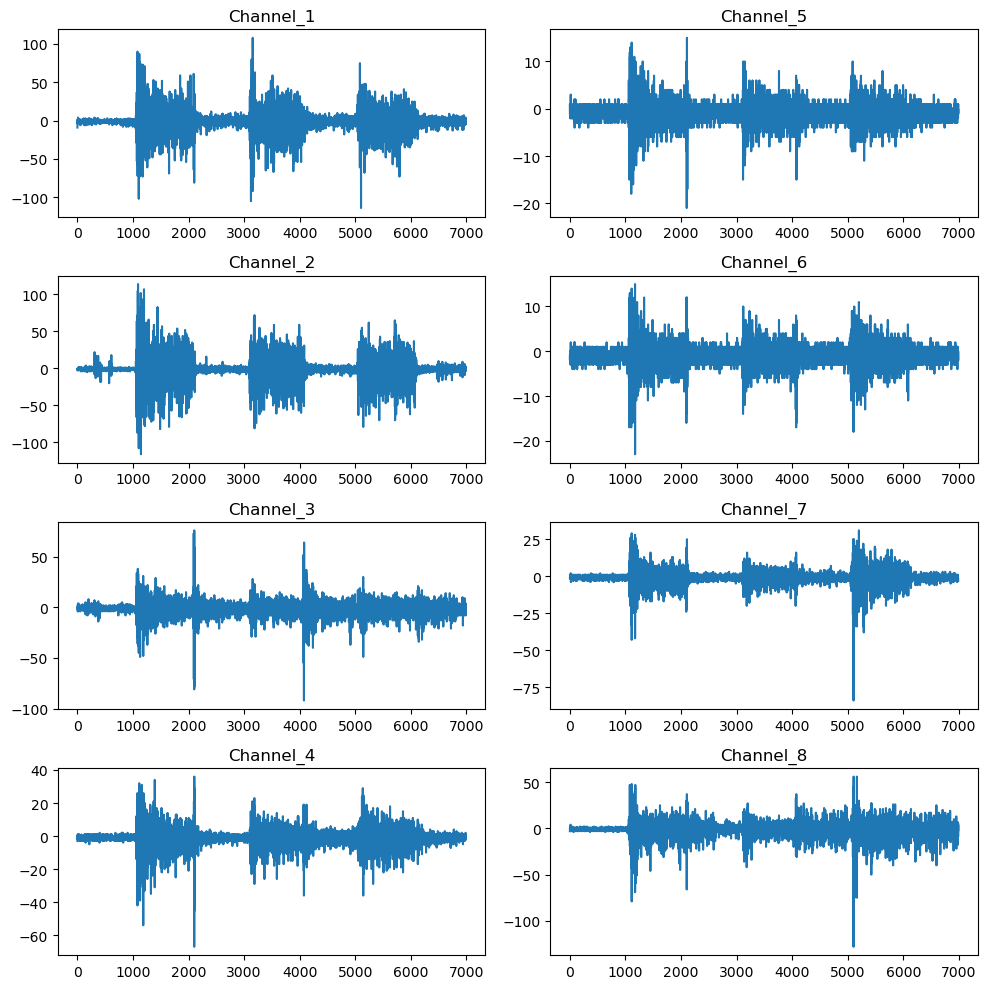

In [6]:
pintar_canales(datos_emg,2)

In [7]:
def separar_canales(df): 
    # Listas para separar en los datos de los dos sensores
    sensor1_data = []
    sensor2_data = []
    
    for index, row in df.iterrows():
        if index % 2 == 0:
            sensor1_data.append(row)
        else:
            sensor2_data.append(row)
    
    # Convertir las listas en DataFrames
    df_sensor1 = pd.DataFrame(sensor1_data).reset_index(drop=True)
    df_sensor2 = pd.DataFrame(sensor2_data).reset_index(drop=True)
    
    #Cambiamos los nombre de los 
    df_sensor1.rename(columns={'Channel_1': 'Channel_S1_1', 'Channel_2': 'Channel_S1_2','Channel_3': 'Channel_S1_3','Channel_4': 'Channel_S1_4','Channel_5': 'Channel_S1_5','Channel_6': 'Channel_S1_6','Channel_7': 'Channel_S1_7','Channel_8': 'Channel_S1_8'}, inplace=True)
    df_sensor2.rename(columns={'Channel_1': 'Channel_S2_1', 'Channel_2': 'Channel_S2_2','Channel_3': 'Channel_S2_3','Channel_4': 'Channel_S2_4','Channel_5': 'Channel_S2_5','Channel_6': 'Channel_S2_6','Channel_7': 'Channel_S2_7','Channel_8': 'Channel_S2_8'}, inplace=True)
    return (df_sensor1,df_sensor2)

In [66]:
(emg_1,emg_2)=separar_canales(datos_emg)

In [9]:
#Si vemos que es necesario podemos concatenar los dataframes
result = pd.concat([emg_1, emg_2], axis=1)

In [80]:
#Par poder pintar dos dataframes 
def pintar_canales_2df(df1,df2,cols):
    try:
        # Verificar si los DataFrames tienen las mismas columnas
        if len(df1.columns) != len(df2.columns):
            raise ValueError("Los DataFrames tienen estructuras diferentes.")
    except ValueError as e:
        print(str(e))
 
    fig, axs = plt.subplots(8, ncols=cols, figsize=(10, 10))

    # Iterar sobre las columnas y hacer un gráfico diferente por columna
    for i, columna in enumerate(df1.columns):
        if columna!= "Tiempo":
            axs[i-1][0].plot(df1.index, df1[columna])
            axs[i-1][0].set_title(columna)
            axs[i-1][1].plot(df2.index, df2[df2.columns[i]])
            axs[i-1][1].set_title(df2.columns[i])


    # Ajustar el espaciado entre subgráficos
    plt.tight_layout()

    # Mostrar la figura
    plt.show()



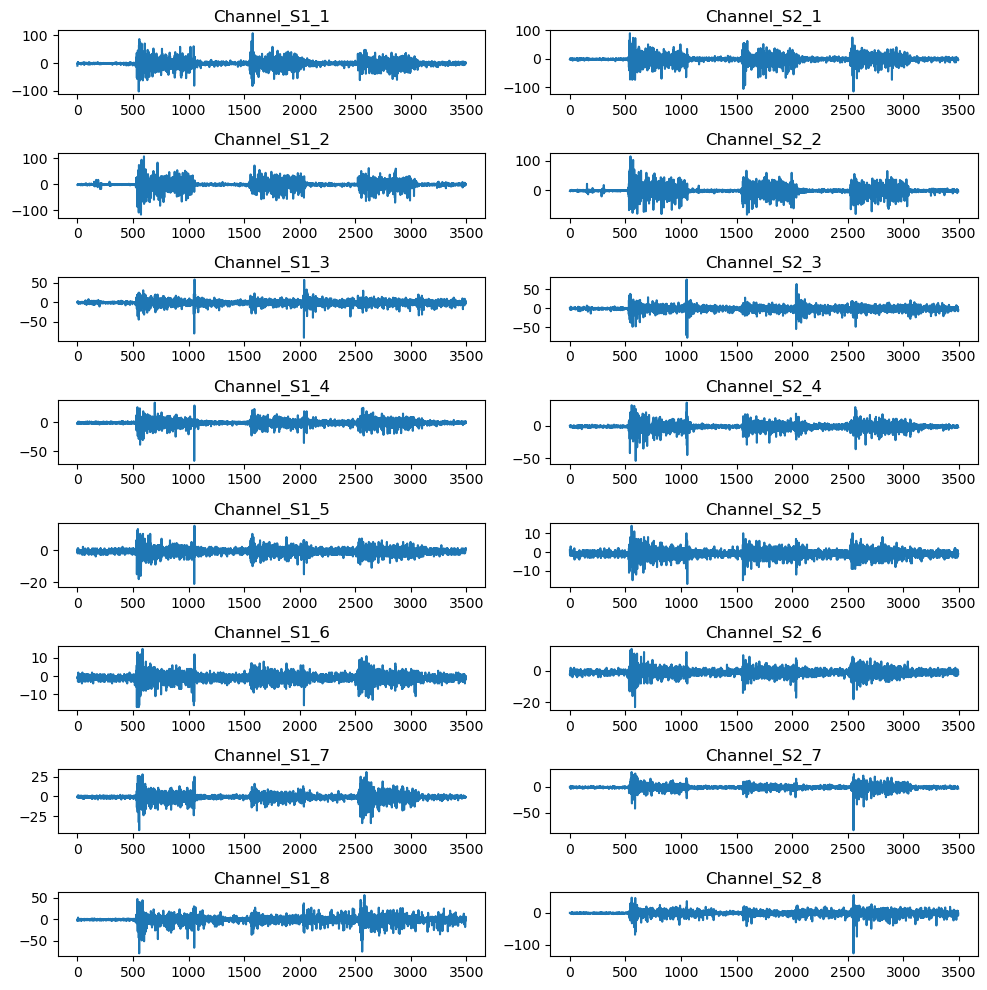

In [81]:
pintar_canales_2df(emg_1,emg_2,2)


In [34]:
def separar_pruebas(df, tiempo): 
    # Listas para separar en los datos de los dos sensores
    datos_1 = []
    datos_2 = []
    datos_3 = []
    
    #Guardamos los datos dependiendo del tiempo
    for index, row in df.iterrows():
        if df["Tiempo"][index] <= tiempo:
            datos_1.append(row)
        elif df["Tiempo"][index] <= 2*tiempo:
            datos_2.append(row)
        else:
            datos_3.append(row)
    
    # Convertir las listas en DataFrames
    df_datos_1 = pd.DataFrame(datos_1).reset_index(drop=True)
    df_datos_2 = pd.DataFrame(datos_2).reset_index(drop=True)
    df_datos_3 = pd.DataFrame(datos_3).reset_index(drop=True)
    
   
    return (df_datos_1, df_datos_2, df_datos_3)


In [35]:
(prb_1,prb_2,prb_3)=separar_pruebas(datos_emg,10.0)

In [36]:
print(prb_3)

         Tiempo  Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  \
0     20.002121       -9.0       -5.0       -1.0        0.0       -2.0   
1     20.002121        9.0        2.0       -6.0       -3.0        2.0   
2     20.014729        5.0       31.0        5.0        5.0       -3.0   
3     20.014729       18.0      -34.0       -4.0       -5.0       -2.0   
4     20.024795       -2.0       -4.0       -4.0       -2.0       -1.0   
...         ...        ...        ...        ...        ...        ...   
2987  34.969979       -2.0       -1.0       -1.0       -1.0       -2.0   
2988  34.978088        4.0       -3.0        4.0        2.0        0.0   
2989  34.978088       -5.0        1.0       -8.0       -2.0       -1.0   
2990  34.984925        2.0        0.0       -3.0       -1.0        1.0   
2991  34.984925       -4.0       -3.0       -5.0       -2.0       -1.0   

      Channel_6  Channel_7  Channel_8  
0           0.0        0.0        4.0  
1           1.0        1.0     

In [110]:
def pintar_varios_df(dfs, cols,nombre):
    
    rows = int((len(dfs[0].columns)-1) / cols)
    
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))
    
    # Iterar sobre las columnas y hacer un gráfico diferente por columna
    for i, columna in enumerate(dfs[0].columns):
        if columna != "Tiempo":
            row_idx = (i-1) % rows
            col_idx = int(((i-1) - (i-1) % rows) / rows)
            ax = axs[row_idx][col_idx]
            for j,df in enumerate(dfs):
                ax.plot(df.index, df[df.columns[i]], label=nombre + ' ' + str(j +1) )

            ax.set_title(df.columns[0])
            ax.legend()

    # Ajustar el espaciado entre subgráficos
    plt.tight_layout()
    
    # Mostrar la figura
    plt.show()

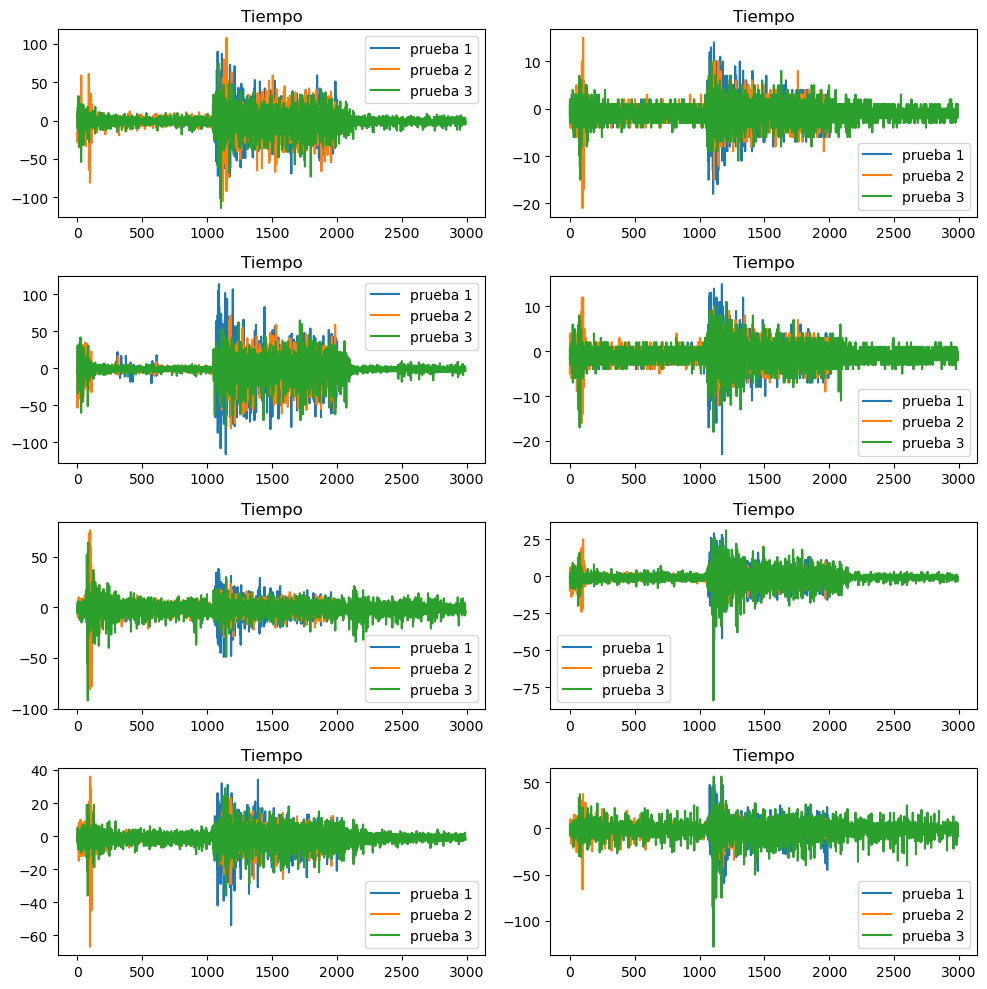

In [111]:
pintar_varios_df([prb_1,prb_2,prb_3],2,'prueba')

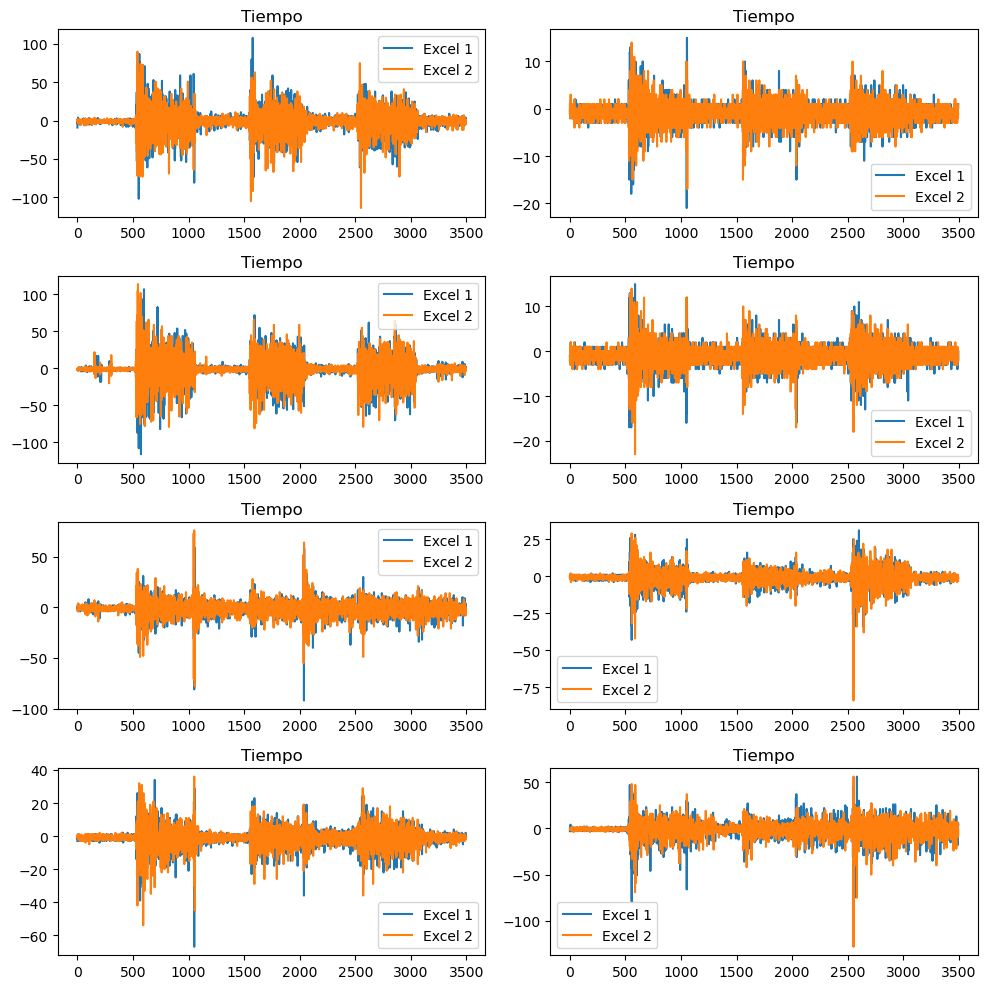

In [113]:
#Probamos si tuviesemos 2 excel con los datos, o varios canales en el mismo
pintar_varios_df([emg_1,emg_2],2,'Excel')
